In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('dataset/covid19_global.csv', sep=';')

In [3]:
data.head()

,datetime,country,country_code,history,latest,province,lat,long,type
0,2020-01-22,Thailand,TH,2.0,322,NaN,15.0,101.0,confirmed
1,2020-01-23,Thailand,TH,3.0,322,NaN,15.0,101.0,confirmed
2,2020-01-24,Thailand,TH,5.0,322,NaN,15.0,101.0,confirmed
3,2020-01-25,Thailand,TH,7.0,322,NaN,15.0,101.0,confirmed
4,2020-01-26,Thailand,TH,8.0,322,NaN,15.0,101.0,confirmed


In [4]:
data['history_log'] = data['history'].apply(lambda history: np.log(history))

In [5]:
china = data[(data['country'] == "China") & (data['type'] == 'confirmed') & (data['province'] == 'Hubei')].sort_values(by=['datetime'])
brazil = data[(data['country'] == "Brazil") & (data['type'] == 'confirmed')].sort_values(by=['datetime'])
italy = data[(data['country'] == "Italy") & (data['type'] == 'confirmed')].sort_values(by=['datetime'])

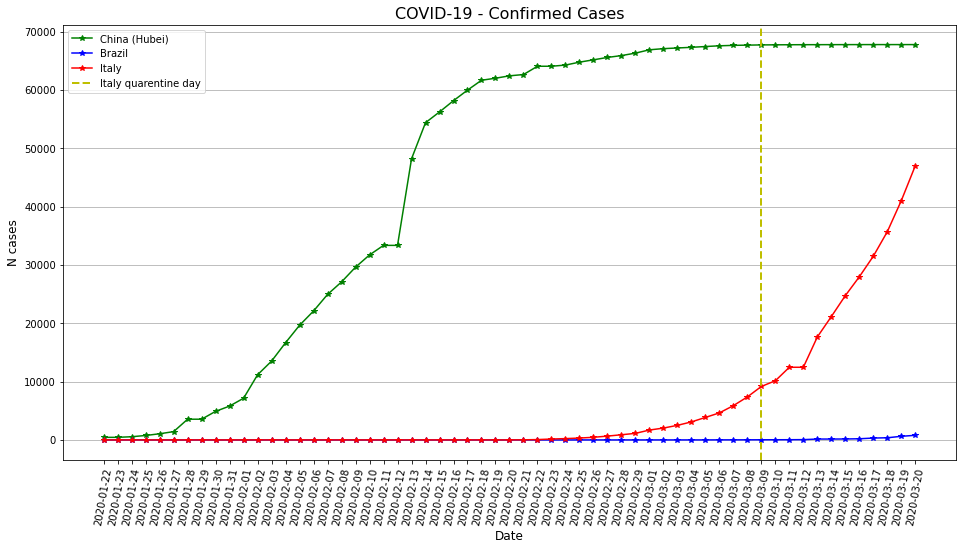

In [6]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(china['datetime'], china['history'], marker='*', label='China (Hubei)', color='green')
ax.plot(brazil['datetime'], brazil['history'], marker='*', label='Brazil', color='blue')
ax.plot(italy['datetime'], italy['history'], marker='*', label='Italy', color='red')

ax.set_title('COVID-19 - Confirmed Cases', fontsize=16)
ax.set_ylabel('N cases', fontsize=12)
ax.set_xticklabels(brazil['datetime'], rotation=80)
ax.set_xlabel('Date', fontsize=12)
ax.axvline(x='2020-03-09', linestyle='--', linewidth=2, color='y', label='Italy quarentine day')

plt.grid(axis='y')
plt.legend()
plt.show()

### Logarithimic Scale

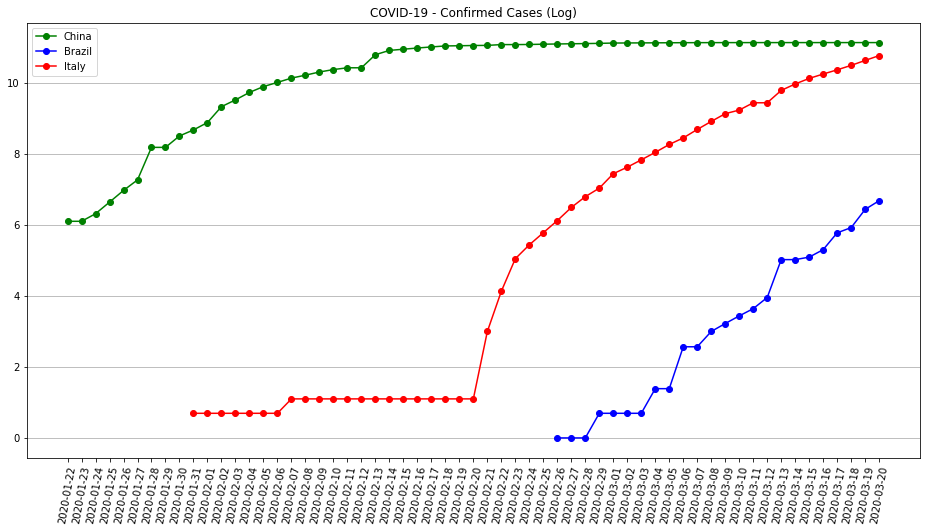

In [7]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(china['datetime'], china['history_log'], '-o', label='China', color='green')
ax.plot(brazil['datetime'], brazil['history_log'], '-o', label='Brazil', color='blue')
ax.plot(italy['datetime'], italy['history_log'], '-o', label='Italy', color='red')

ax.set_title('COVID-19 - Confirmed Cases (Log)')
ax.set_xticklabels(brazil['datetime'], rotation=80)
plt.grid(axis='y')
plt.legend()
plt.show()